Der Code wird im Folgenden erst beschrieben und unter der jeweiligen Beschreibung eingebunden.

# Python Porgramm frei stehender Bogen

Zu Beginn werden die für das Programm benötigten Python Bibliotheken importiert.

In [1]:
import math
import numpy as np
import matplotlib.pyplot as plt
from shapely.geometry import Polygon
from stl import mesh # pip install nump-stl

<frozen importlib._bootstrap>:488: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.


-------------------

## Bestimmung der Funktionsgleichung

Für den Bau des Bogens, hab ich bestimmte Parameter festgelegt, die der Bogen erfüllen soll.<br> 
Einerseits die Länge $L$ des Bogens (Bogenlänge zwischen den Nullstellen) und die Nullstelle $x_0$, bzw. die Hälfte der Bogenbreite (siehe Abbildung). Zu dem ist die Anzahl an Klötzen, die Breite eines Klotzes und die durch einen Klotz beschriebene Bogenlänge determiniert.<br>
Der Bogen wird durch eine hängende Kette beschrieben.

<center>
<img src="bilder/geogebra_x0_l.png" alt="Graph Kettenlinie" style="width:500px;"/>
</center>

Hier werden die Parameter des Bogens initialisiert. Die Bogenlänge $L$ hat hier den Variablennamen L. Die Nullstelle $x_0$ den Namen x0.

In [2]:
L = 136
x0 = 30
anzahlKloetze = 17
laengeDurchKlotzSimuliert = 8 #die Bogenlänge, die durch einen Klotz simuliert wird
breiteKloetze = 4

-------------------

# Ermittlung Faktor $a$ als Nullstelle von $g(a)$ mittels Intervallhalbierung durch eine rekursive Python-Funktion

Für die Funktion, welche die Kette beschreibt, gilt: $f(x)= a \cdot \cosh \left( \frac{1}{a}x \right) + y_{0}$ (siehe PDF, Kapitel 5)

Der Faktor $a$ ist die Nullstelle der Funktion $g(a) := L - 2a \cdot \sinh \left( \frac{1}{a} x_{0} \right)$ (siehe PDF, Kapitel 6.2)<br>
Die numerische Bestimmung **der Nullstelle** erfolgt hier mit Hilfe von Intervallhalbierung:

Beim Funktionsaufruf, wird eine untere und eine obere Grenze festgelegt. Für die Variable a wird die Mitte zwischen diesen Werten gewählt.
Danach wird in der Variable f_a der aktuelle Wert von $g(a) = L - 2a \cdot \sinh \left( \frac{1}{a} x \right)$ abgelegt.

Ist dieser Wert kleiner als $\frac{1}{10000000}$, also näherungsweise Null, wird der Wert von a zurückgegeben.

Andernfalls wird geprüft ob der Wert der Variablenwert f_a größer oder kleiner ist als Null.
Dann folgt ein **rekursiver** Funktionsaufruf, ist f_a größer Null wird der Variablenwert von a als obere Grenze übergeben und die untere Grenze bleibt gleich. Ist f_a kleiner erfolgt der **rekursive** Aufruf mit dem Variablenwert von a als untere Grenze, die obere Grenze bleibt gleich. 

In [3]:
def a_bestimmen(unterGrenze,oberGrenze):
    a = (unterGrenze+oberGrenze)/2
    f_a = (L-2*a*math.sinh(1/a*x0))
    if( abs(f_a) < 1/10000000 ):
        return a
    elif (f_a < 0):
            return a_bestimmen(a,oberGrenze);
    else:
        return a_bestimmen(unterGrenze,a);

In [4]:
a = a_bestimmen(10,16)
print("a : ", a)

a :  12.541937507689


---------

Setzt man $f(x_0) = 0$ und formt nach $y_0$ um erhält man: <br>
$y_{0} = -a \cdot \cosh \left( \frac{1}{a}x \right)$ (siehe Kapitel 6.2)<br>
Dieser Wert wird in der Variablen y0 abgespeichert.

In [5]:
y0 = -a*math.cosh(1/a*x0)

-------------------

Jetzt sind alle Größe der Funktion $f(x)= a \cdot \cosh \left( \frac{1}{a}x \right) + y_{0}$ bekannt und die Funktion der Kettenlinie und deren Ableitung werden hier initialisiert, damit in anderen Funktionen der Funktionswert nicht händisch über die Funktionsgleichung bestimmt werden muss, sondern einfach kettenlinie(x) benutzt werden kann.

In [6]:
kettenlinie = lambda x: (a*np.cosh(1/a * x)+y0)
ableitung = lambda x: (np.sinh(1/a * x)) #siehe Ableitungsregeln PDF

## Bestimmung der x und y-Werte

Die Funktion $x(l) = a \cdot arcsinh \left( \frac{l}{a} \right)$ (siehe PDF Kapitel 6.3) liefert einen x-Wert in Abhängigkeit von einer Bogenlänge $l$.<br>
Hier liefert die Funktion x_werte_l(l) den x-Wert zur zugehörigen Bogenlänge l.

In [7]:
x_werte_l = lambda l: (np.arcsinh(l/a) * a)

-------------------

Um eine Liste der benötigten x-Werte zu erhalten, läuft in der folgenden Funktion eine for Schleife von -(der Hälfte der vorgegebenen Bogenlänge (Nullstelle im negativen Bereich)) bis zur +(Hälfte der vorgegeben Bogenlänge (Nullstelle auf positiver Seite)).<br>
In jedem Schleifendurchlauf, wird i um die größe der Variable laengeDurchHolzStueckeSimuliert (Länge vom Bogen, welche durch einen Klotz beschrieben wird) erhöht, und mit diesem i wird die Funktion x_werte_l(l) aufgerufen. i ist also praktisch die momentane Bogenlänge. Der Rückgabewert wird zur Liste hinzugefügt.

In [8]:
def x_werte_holzstuecke():
    x_werte_holzstuecke = [] #die Liste wird initialisiert
    for i in range (-int(L/2), int(L/2+1), laengeDurchKlotzSimuliert): #for-Schleife die über die Bogenlänge iteriert
        x_werte_holzstuecke.append(x_werte_l(i)) #die Liste wird um den Rückgabewert der Funktion x_werte_l(i) erweitert
    return x_werte_holzstuecke #die Liste wird zurückgegeben

In [9]:
x_werte = x_werte_holzstuecke() #in der Variable x_werte wird die Liste der x-Werte gespeichert
print("x Werte:")
print(x_werte)

x Werte:
[-30.000000004186834, -28.459695195406937, -26.708667641693076, -24.682268897417455, -22.282466596571965, -19.352603653310144, -15.629065100279782, -10.666755857440647, -3.9351171525557147, 3.9351171525557147, 10.666755857440647, 15.629065100279782, 19.352603653310144, 22.282466596571965, 24.682268897417455, 26.708667641693076, 28.459695195406937, 30.000000004186834]


-------------------

Um eine Liste mit den zugehörigen y-Werte zu bekommen, läuft die folgende Funktion durch die Liste der x-Werte, welche als Parameter übergeben wird, und fügt den jeweiligen Funktionswert von kettenlinie = lambda x: (a*np.cosh(1/a * x)+y0) zur Liste hinzu.

In [10]:
def y_werte_holzstuecke(xWerteListe):
    yWerte = []
    for i in xWerteListe:
        yWerte.append(kettenlinie(i))
    return yWerte

In [11]:
y_werte = y_werte_holzstuecke(x_werte)
print("y Werte:")
print(y_werte)

y Werte:
[2.2700234580952383e-08, -7.8501259341093075, -15.655823782564553, -23.39434867569104, -31.024771774511088, -38.466330404901925, -45.53973992575219, -51.78894544268181, -55.982593128987965, -55.982593128987965, -51.78894544268181, -45.53973992575219, -38.466330404901925, -31.024771774511088, -23.39434867569104, -15.655823782564553, -7.8501259341093075, 2.2700234580952383e-08]


## Bestimmung der Winkel zwischen den Klötzen

Um die Winkel zwischen den Klötzen zu bestimmen, werden die Sekanten-Steigungswinkel der Klötze benötigt.<br>
Die folgende Funktion bestimmt den Steigungswinkel der Sekante durch die Punkte p1 und p2:

In [12]:
def sekantenSteigungsWinkel(p1, p2): #p1 und p2 werden als Parameter übergeben
    m = (kettenlinie(p1)-kettenlinie(p2))/(p1-p2) #Steigung wird bestimmt
    return (np.arctan(m)/(2 * math.pi) * 360) #bestimmung des Steigungswinkels und umrechnen von Radiant in Grad

--------

Die folgende Funktion liefert eine Liste mit den Sekantensteiungswinkeln, welche jeweils durch einen Klotz laufen.<br>
Dafür wird erst der erste Steiungswinkel hinzugefügt und zu letzt der letzte (siehe PDF Kapitel 6.4). Dazwischen läuft eine for-Schleife durch die Liste der x-Werte und ruf jeweils die Funktion sekantenSteigungsWinkel(x_werte[i], x_werte[i+1]) mit dem momentanen und dem darauf folgenden x-Wert auf.

In [13]:
def sekantenSteigungsWinkelListe(x_werte):
    steigungsWinkel = []
    steigungsWinkel.append( np.arctan( (kettenlinie(x_werte[0])-(-1)*kettenlinie(x_werte[1]))/(x_werte[0]-x_werte[1]) ) / (2*math.pi)*360 ) # siehe PDF Besonderheiten erster und letzter Klotz
    for i in range(0,len(x_werte)-1): # von 0 bis len-1
        steigungsWinkel.append(sekantenSteigungsWinkel(x_werte[i], x_werte[i+1]))
    
    steigungsWinkel.append( np.arctan( (kettenlinie(x_werte[len(x_werte)-1])-(-1)*kettenlinie(x_werte[len(x_werte)-2]))/(x_werte[len(x_werte)-1]-x_werte[len(x_werte)-2]) ) / (2*math.pi)*360 ) ##
    return steigungsWinkel

In [14]:
sekantenSteigungswinkelWerteListe = sekantenSteigungsWinkelListe(x_werte)
print("Sekanten-Steigungswinkel:")
print(sekantenSteigungswinkelWerteListe)

Sekanten-Steigungswinkel:
[78.898795820709, -78.898795883317, -77.35633239230725, -75.32608580825179, -72.54140437136391, -68.50963158917503, -62.2370737375766, -51.54795029298983, -31.92190536112552, -0.0, 31.92190536112552, 51.54795029298983, 62.2370737375766, 68.50963158917503, 72.54140437136391, 75.32608580825179, 77.35633239230725, 78.898795883317, -78.898795820709]


-------------

Mit Hilfe dieser Sekanten-Steigungswinkel wird nun der "Schneidewinkel", bzw. die Hälfte des Winkels zwischen den Klötzen (siehe PDF Kapitel 6.4), bestimmt.<br>
Dafür läuft die nachfolgende Funktion durch die Liste der Sekanten-Steigungswinkel und bestimmt nach Gleichung (30) (siehe PDF Kapitel 6.4) den Winkel $\lambda$ (Hälfte des Winkels zwischen den Klötzen).

In [15]:
def winkelZwischenKloetzenHalbe(sekantenSteigungsWinkel):
    listeWinkel = []
    listeWinkel.append(sekantenSteigungsWinkel[0])
    for i in range(1,len(sekantenSteigungsWinkel)-2):
        listeWinkel.append((180 - sekantenSteigungsWinkel[i+1] + sekantenSteigungsWinkel[i])/2)
    listeWinkel.append(abs(sekantenSteigungsWinkel[len(sekantenSteigungsWinkel)-1]))
    return listeWinkel

In [16]:
winkelZwischenKloetzenHalbeWerte = winkelZwischenKloetzenHalbe(sekantenSteigungswinkelWerteListe)
print("Winkel zwischen den Klötzen halbe (Schneidewinkel):")
print(winkelZwischenKloetzenHalbeWerte)

Winkel zwischen den Klötzen halbe (Schneidewinkel):
[78.898795820709, 89.22876825449512, 88.98487670797226, 88.60765928155607, 87.98411360890556, 86.86372107420078, 84.65543827770662, 80.18697753406784, 74.03904731943724, 74.03904731943724, 80.18697753406784, 84.65543827770662, 86.86372107420078, 87.98411360890556, 88.60765928155607, 88.98487670797226, 89.22876825449512, 78.898795820709]


## Bestimmung der Klotzmaße

Zu Beginn wird die Länge der Sekanten, welche die Klötze beschreiben, bestimmt.<br>
Dies erfolgt, indem die Funktion mittels einer for-Schleife durch die Liste der x-Werte läuft und immer den aktuellen und den folgenden x-Wert nimmt und zu diesen die y-Werte bestimmt. Mit Hilfe des Satz von Pythagoras wird die Länge der Sekanten bestimmt. (siehe PDF Kapitel 6.5.1)

In [17]:
def sekantenLaengen(xWerteListe):
    sekantenLaengen = []
    for i in range(0, len(xWerteListe)-1):
        y1 = kettenlinie(xWerteListe[i])
        y2 = kettenlinie(xWerteListe[i+1])
        sekantenLaengen.append(math.sqrt((xWerteListe[i+1]-xWerteListe[i])**2 + (y2-y1)**2))
    return sekantenLaengen

In [18]:
sekantenLaengenWerte = sekantenLaengen(x_werte)
print("Sekantenlängen:")
print(sekantenLaengenWerte)

Sekantenlängen:
[7.99981352543454, 7.999688518638961, 7.999441192504645, 7.998900408815565, 7.997555358723262, 7.993613801376608, 7.97979214105169, 7.931055451197266, 7.870234305111429, 7.931055451197266, 7.97979214105169, 7.993613801376608, 7.997555358723262, 7.998900408815565, 7.999441192504645, 7.999688518638961, 7.99981352543454]


--------------

Da die Sekanten durch die Mitte der Klötze läuft, kommen durch die Schräge beim schneiden auf der Außenseite des Bogens noch Längen dazu und innerhalb fallen genau diese weg (siehe PDF Kapitel 6.5.2).<br>
Die zusetzlichen Längen werden bestimmt, indem die Hälfte der Breite mit dem Tangens des jeweiligen Winkels im Klotz multipliziert wird, (siehe PDF Gleichung (33)).

In [19]:
def zusetzlicheLaengenstuecke(winkelInHolzStueck):
    langeSeite = []
    for i in range(0,len(winkelInHolzStueck)):
        langeSeite.append(2 / math.tan(math.radians(winkelInHolzStueck[i])))
    return langeSeite

In [20]:
zusetzlicheLaengenstueckeWerte = zusetzlicheLaengenstuecke(winkelZwischenKloetzenHalbeWerte) #als Parameter wird winkelZwischenKloetzenHalbeWerte übergeben, da diese Winkel jenen in den Klötzen sind
print("Zusetzliche Längenelemente:")
print(zusetzlicheLaengenstueckeWerte)

Zusetzliche Längenelemente:
[0.39242805176953294, 0.026922692534157827, 0.03543819562185135, 0.04861142898944077, 0.07039676027437022, 0.10958625970258735, 0.18710338770379092, 0.3459281360982313, 0.5720159803737838, 0.5720159803737838, 0.3459281360982313, 0.18710338770379092, 0.10958625970258735, 0.07039676027437022, 0.04861142898944077, 0.03543819562185135, 0.026922692534157827, 0.39242805176953294]


-------------------

Da nun alle Größen bekannt sind, kann die außere Länge der Klotze bestimmt werden. Da der erste und letzte Klotz von den anderen unterscheiden, liefert die folgende Methode nur die Mittleren Längen.<br>
Es wird die jeweilige Sekantenlänge mit den beiden zusetzlichen Länge addiert. Zu beachten ist, dass die beiden zusatzlängen Längen in einem Klotz verschieden voneinander sind.

In [21]:
def laengeKloetzeAussenListe(sekantenLaengenListe, zusetzlicheLaengenListe):
    laengen = []
    for i in range(0,len(sekantenLaengenListe)):#1 bis len-1
        laengen.append(sekantenLaengenListe[i] + zusetzlicheLaengenListe[i] + zusetzlicheLaengenListe[i+1])
    return laengen

In [22]:
laengeKloetzeAussenWerteListe = laengeKloetzeAussenListe(sekantenLaengenWerte, zusetzlicheLaengenstueckeWerte)
print("Klotzelängen Außen:")
print(laengeKloetzeAussenWerteListe)

Klotzelängen Außen:
[8.41916426973823, 8.062049406794971, 8.083490817115937, 8.117908598079376, 8.177538378700218, 8.290303448782986, 8.512823664853713, 8.848999567669281, 9.014266265858998, 8.848999567669281, 8.512823664853713, 8.290303448782986, 8.17753837870022, 8.117908598079376, 8.083490817115939, 8.06204940679497, 8.41916426973823]


Das gleiche geschieht in der nachfolgenden Funktion für die innere Länge. Hier werden die zusetzlichen Längenelemente von der Sekantenlänge subtrahiert.

In [23]:
def laengeKloetzeInnenListe(sekantenLaengenListe, zusetzlicheLaengenListe):
    laengen = []
    for i in range(0,len(sekantenLaengenListe)):#1 bis len-1
        laengen.append(sekantenLaengenListe[i] - zusetzlicheLaengenListe[i] - zusetzlicheLaengenListe[i+1])
    return laengen

In [24]:
laengeKloetzeInnenWerteListe = laengeKloetzeInnenListe(sekantenLaengenWerte, zusetzlicheLaengenstueckeWerte)
print("Klotzelängen Innen:")
print(laengeKloetzeInnenWerteListe)

Klotzelängen Innen:
[7.580462781130849, 7.937327630482952, 7.915391567893353, 7.8798922195517545, 7.817572338746304, 7.696924153970229, 7.446760617249668, 7.013111334725251, 6.7262023443638626, 7.013111334725251, 7.446760617249668, 7.696924153970229, 7.817572338746304, 7.8798922195517545, 7.915391567893353, 7.937327630482952, 7.580462781130849]


---------------------------------------------------------

## Zeichnen der Kettenlinie

Die folgende Funktion zeichnet eine Funktion f, die als Parameter übergeben wird.<br>
Hier ist diese Funktion nützlich, da man sich so ein Bild von der Kettenlinie machen kann.

In [25]:
def funktionZeichnen(f, xmin, xmax, label=None):
    x_values = np.linspace(xmin, xmax, 300) #eine Liste an x-Werten wird erzeugt. 300 x-Werte im Bereich zwischen xmin und xmax
    y_values = f(x_values) #die zugehörigen y-Werte werden bestimmt

    plt.axhline(0, color='black',linewidth=1)
    plt.axvline(0, color='black',linewidth=1)

    plt.plot(x_values, y_values, label=label) #die Punkte, die die x- und y-Werte bilden werden eingezeichnet, da es relativ viele sind, sieht es nach einer Kurve aus

    plt.xlabel('x') #Achsenbeschriftung
    plt.ylabel('y')
    plt.title(f'Graph der Funktion {label}')
    plt.grid(True)
    plt.legend()
    plt.show()

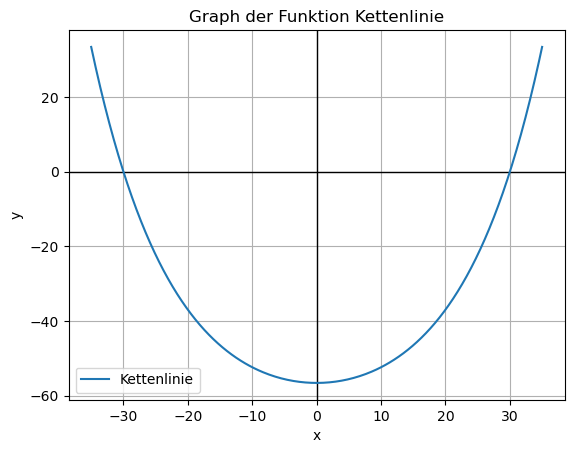

In [26]:
funktionZeichnen(kettenlinie,-35,35, "Kettenlinie") #Funktionsaufruf mit der Gleichung der zuvor bestimmten Kettenlinie

---------

## Speichern der Klötze und graphische Kontrolle

Die nachfolgende Funktion, speichert die Klötze als stl-Datei ab und zeichnet die Klötze zur Kontrolle. Da diese Funktion realativ komplex ist, sind einzelne Befehle erklärt. Die Erklärungen sind direkt hinter den Zeilen.

In [27]:
def kloetzeAbspeichern(sekantenLaengen, laengeKloetzeAussen, zusetzlicheLaenge, x_werte, y_werte, sekantenSteigungswinkelListe):
    for n in range (0, len(laengeKloetzeAussen)): #Schleife läuft von Null bis zur Anzahl der Klötze
        theta = np.radians(sekantenSteigungswinkelListe[n+1]) + np.radians(180) #theta ist der Winkel, um den der Klotz gedreht wird, bei n+1 weil trick mit erster und letzter klotz +180 da rechtsrum gedreht wird
        c, s = np.cos(theta), np.sin(theta) #in c wird der cosinus von theta geschrieben, in s der sin
        R = np.array(((c, -s), (s, c))) #Drehmatrix R wird initialisiert (siehe PDF Gleichung (7))

        #die Koordinaten der Punkte werden bestimmt (siehe PDF Abbildung 26). Hier liegt der Klotz noch an dem Nullpunkt
        a = np.array([-zusetzlicheLaenge[n+1], 2])
        b = np.array([ zusetzlicheLaenge[n+1],-2])
        c = np.array([-zusetzlicheLaenge[n+1]+laengeKloetzeAussen[n], 2])
        d = np.array([-zusetzlicheLaenge[n+1]+laengeKloetzeAussen[n]-2*zusetzlicheLaenge[n],-2])

        v = np.array([x_werte[n+1], y_werte[n+1]]) #v ist der Ortsvektor des Punktes, der beim bestimmen der Koordinaten auf den Nullpunkt gelegt wurde

        #die die Punkte a,b,c,d werden mit der Drehmatrix R multipliziert und mit dem Vektor v addiert und liegen jetzt auf der richtigen Stelle auf dem Funktionsgraphen
        a1 = np.dot(R,a)+v
        b1 = np.dot(R,b)+v
        c1 = np.dot(R,c)+v
        d1 = np.dot(R,d)+v

        plt.rcParams["figure.figsize"] = [7.00, 3.50] #legt die Größe der Matplotlib-Figuren fest (Größen in Zoll)
        plt.rcParams["figure.autolayout"] = True #aktivieren das automatische Layout

        polygon2 = Polygon([a1,c1,d1,b1,]) #eine Figur des Klotzes wird erstellt. Hierbei sind die Seiten a1c1 c1d1 d1b1 und b1a1

        x, y = polygon2.exterior.xy #der Variable x werden die x-Werte der Koordinaten zugeordnet, der Variable y die y-Werte
        plt.plot(x, y, c="black") #Die Punkte werden gezeichnet und gezeichnet (mit den Seiten des polygon2)

        #definition der Eckpunkte eines Klotzes a[0]/b[0]/... sind die x-Koordinaten der jeweiligen Punkte, a[1]/b[1]/... die y-Koordinaten
        #0 und vier sind die z-Koordinaten. Also ist ein Klotz hier 4LE hoch
        vertices = np.array([\
            [a[0], a[1] , 0], #[-1, -1, -1], #0
            [b[0], b[1] , 0], #[+1, -1, -1], #1
            [d[0], d[1] , 0], #[+1, +1, -1], #2
            [c[0], c[1] , 0], #[-1, +1, -1], #3
            [a[0], a[1] , 4], #[-1, -1, +1], #4 
            [b[0], b[1] , 4], #[+1, -1, +1], #5 
            [d[0], d[1] , 4], #[+1, +1, +1], #6
            [c[0], c[1] , 4]]) #[-1, +1, +1]]) #7
        #die Flächen des Klotzes werden durch Dreiecke definiert
        faces = np.array([\
            [0,3,1],
            [1,3,2],
            [0,4,7],
            [0,7,3],
            [4,5,6],
            [4,6,7],
            [5,1,2],
            [5,2,6],
            [2,3,6],
            [3,7,6],
            [0,1,5],
            [0,5,4]])

        cube = mesh.Mesh(np.zeros(faces.shape[0], dtype=mesh.Mesh.dtype)) #ein Würfel mit den Flächen aus dem Array faces wird erzeugt
        for i, f in enumerate(faces): #schleife läuft über alle einträge im faces array
            for j in range(3): #schleife läuft über die drei Eckpunkte eines Dreiecks im faces Array
                cube.vectors[i][j] = vertices[f[j],:] #jetzt werden die Eckepunkte des cubes mit den Koordinaten aus dem vertices array gefüllt, also beschreibt dieser cube jetzt den aktuellen Klotz

        #der cube wird als stl datei gespeichert (dateityp der für den druck verwendet wird). Hier ist der Befehl auskommentiert, da sonst beim Ausführen der Funktion direkt ohen Nachfrage die stl Dateien der Klötze abgespeichert werden                
        #cube.save('cube'+str(n)+'.stl')

    #die Funktion der Kettenlinie wird gezeichnet (gleiches Verfahren wie in der Funktion zeichnen)
    x_values = np.linspace(-35, 35, 300)
    y_values = kettenlinie(x_values)

    plt.axhline(0, color='black',linewidth=1)
    plt.axvline(0, color='black',linewidth=1)
    
    
    plt.plot(x_values, y_values)
    plt.show()

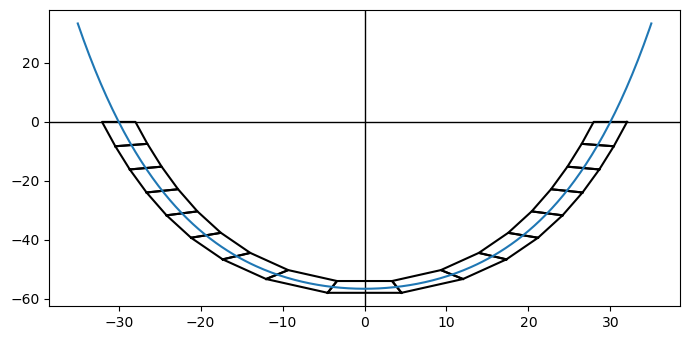

In [28]:
kloetzeAbspeichern(sekantenLaengenWerte, laengeKloetzeAussenWerteListe, zusetzlicheLaengenstueckeWerte, x_werte, y_werte, sekantenSteigungswinkelWerteListe)

Die Graphik ist verzerrt, führt man das Programm lokal aus, kann man die Fenstergröße anpassen, sodass die Maßstäbe passend sind.

----

Diese Programmdokumentation kann unter [https://andreas-di.github.io/jupyter/lab/index.html](https://andreas-di.github.io/jupyter/lab/index.html) aufgerufen werden.